<a href="https://colab.research.google.com/github/dudeurv/SAM_MRI/blob/main/MRI_slicing_coronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Nibabel

In [1]:
!pip -q install nibabel

Importing

In [2]:
import os
import nibabel as nib # used for reading and writing neuroimaging data formats, including NIFTI
import numpy as np # for operations on large arrays and matrices of numeric data.
import matplotlib.pyplot as plt
import cv2 # OpenCV library used for computer vision and image processing tasks

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import nibabel as nib

# Load the NIfTI file
nifti = nib.load('/content/drive/MyDrive/endonasal_mri_patients/mri0066/mri0066_t1c.nii.gz')

# Get the voxel dimensions
voxel_dims = nifti.header.get_zooms()  # Tuple of (X, Y, Z) dimensions in mm

print(voxel_dims)

(0.48828125, 0.48828125, 1.5)


Endonasal

In [44]:
import os
import nibabel as nib
import numpy as np
import cv2
import scipy.ndimage

def slice_nifti_endonasal(input_folder: str) -> None:
    """
    This function takes a folder of NIfTI MRI files, extracts 2D axial slices from each 3D volume,
    and saves them as PNG images in a new folder.

    Parameters:
    - input_folder (str): The path to the folder containing the NIfTI folders.
    """

    # Define patient MRI IDs and file types
    patient_ids = ["153", "155", "167", "170", "169", "154", "164", "151", "152", "066"]
    file_types = ["t1c", "masks"]

    # Create output folders for each file type
    output_folders = {file_type: f"{file_type}_slices" for file_type in file_types}
    for folder in output_folders.values():
        if not os.path.exists(folder):
            os.makedirs(folder)

    # Loop through all folders in the input folder
    for folder in os.listdir(input_folder):

        full_folder_path = os.path.join(input_folder, folder)

        print("Contents of ", full_folder_path, ": ", os.listdir(full_folder_path))

        # Process each file in the patient folder
        for filename in os.listdir(full_folder_path):
            print("Found file:", filename)
            filepath = os.path.join(full_folder_path, filename)

            image = nib.load(filepath)
            array = image.get_fdata()

            # Determine the type of file and set the output folder
            if "t1c" in filename:
                output_folder = output_folders["t1c"]
                array = cv2.normalize(array, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
            elif "mask" in filename:
                output_folder = output_folders["masks"]
            else:
                continue  # Skip files that don't match the pattern

            # Save each slice as a PNG image
            for y in range(array.shape[1]):  # Change the loop to iterate over the Y-axis
                normalized_slice = np.rot90(array[:, y, :], k=1)

                # Create an empty (padded) array
                img_pad = np.zeros((512, 512), dtype=np.uint8)

                # Calculate the center of the padded array
                center_x = (512 - normalized_slice.shape[0]) // 2
                center_y = (512 - normalized_slice.shape[1]) // 2

                # Place the normalized slice into the center of the padded array
                img_pad[center_x:center_x + normalized_slice.shape[0], center_y:center_y + normalized_slice.shape[1]] = normalized_slice

                output_filename = os.path.join(output_folder, f"{folder}_slice{y}.png")
                cv2.imwrite(output_filename, img_pad)  # Save the padded image

    print(f"Completed slicing. T1c slices have been saved to {output_folders['t1c']}.")
    print(f"Completed slicing. Segmentation slices have been saved to {output_folders['masks']}.")

# Example usage
if __name__ == "__main__":
    folder_path = '/content/drive/MyDrive/endonasal_mri_patients'
    os.makedirs('endonasal_mri_slices', exist_ok = True)
    slice_nifti_endonasal(folder_path)

Contents of  /content/drive/MyDrive/endonasal_mri_patients/mri0066 :  ['mri0066_mask.nii.gz', 'mri0066_t1c.nii.gz']
Found file: mri0066_mask.nii.gz
Found file: mri0066_t1c.nii.gz
Contents of  /content/drive/MyDrive/endonasal_mri_patients/mri0152 :  ['mri0152_t1c.nii.gz', 'mri0152_mask.nii.gz']
Found file: mri0152_t1c.nii.gz
Found file: mri0152_mask.nii.gz
Contents of  /content/drive/MyDrive/endonasal_mri_patients/mri0155 :  ['mri0155_t1c.nii.gz', 'mri0155_mask.nii.gz']
Found file: mri0155_t1c.nii.gz
Found file: mri0155_mask.nii.gz
Contents of  /content/drive/MyDrive/endonasal_mri_patients/mri0170 :  ['mri0170_t1c.nii.gz', 'mri0170_mask.nii.gz']
Found file: mri0170_t1c.nii.gz
Found file: mri0170_mask.nii.gz
Contents of  /content/drive/MyDrive/endonasal_mri_patients/mri0154 :  ['mri0154_t1c.nii.gz', 'mri0154_mask.nii.gz']
Found file: mri0154_t1c.nii.gz
Found file: mri0154_mask.nii.gz
Contents of  /content/drive/MyDrive/endonasal_mri_patients/mri0153 :  ['mri0153_t1c.nii.gz', 'mri0153_mas

In [43]:
import shutil
# Delete any folders if needed
folder_path =  '/content/drive/MyDrive/endonasal_mri_slices'
folder_path1 = '/content/masks_slices'
folder_path2 ='/content/t1c_slices'
shutil.rmtree(folder_path2)
print(f"Successfully deleted folder")

Successfully deleted folder


[None] [None]


TypeError: Image data of dtype object cannot be converted to float

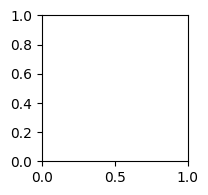

In [45]:
img = cv2.imread('/content/drive/MyDrive/Endonasal_Slices/Train/t1c_slices/mri0066_slice42.png')
mask = cv2.imread('/content/drive/MyDrive/Endonasal_Slices/Train/masks_slices/mri0066_slice42.png')
print(np.unique(img), np.unique(mask))

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.axis('OFF')
plt.subplot(132), plt.imshow(mask, cmap='gray')
plt.axis('OFF');
mask[mask==1] = 127
mask[mask==2] = 255
plt.subplot(133), plt.imshow(mask, cmap='gray')
plt.axis('OFF');